In [4]:
# Lab 6 Softmax Classifier
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

    

0 6.247937
200 0.53398067
400 0.42206126
600 0.34261703
800 0.26828223
1000 0.22655834
1200 0.20543817
1400 0.1879079
1600 0.17309071
1800 0.16039485
2000 0.14939515
--------------
[[1.9919185e-03 9.9799699e-01 1.1013929e-05]] [1]
--------------
[[0.9086645  0.07732824 0.01400719]] [0]
--------------
[[1.1376309e-08 3.2811754e-04 9.9967194e-01]] [2]
--------------
[[1.9919185e-03 9.9799699e-01 1.1013929e-05]
 [9.0866452e-01 7.7328242e-02 1.4007189e-02]
 [1.1376309e-08 3.2811754e-04 9.9967194e-01]] [1 0 2]


In [8]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[0:-5, 0:-1]
y_data = xy[0:-5, [-1]]
x_test = xy[-5:, 0:-1]
y_test = xy[-5:, [-1]]
print(x_data.shape, y_data.shape)
print(x_test.shape, y_test.shape)
'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)

'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss

#fist
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=tf.stop_gradient([Y_one_hot])))
#second
cost = tf.reduce_mean(-tf.reduce_sum(Y_one_hot * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_test})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_test.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


(96, 16) (96, 1)
(5, 16) (5, 1)
one_hot: Tensor("one_hot_6:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape_6:0", shape=(?, 7), dtype=float32)
Step:     0	Cost: 8.578	Acc: 4.17%
Step:   100	Cost: 0.649	Acc: 84.38%
Step:   200	Cost: 0.416	Acc: 88.54%
Step:   300	Cost: 0.306	Acc: 90.62%
Step:   400	Cost: 0.242	Acc: 92.71%
Step:   500	Cost: 0.199	Acc: 94.79%
Step:   600	Cost: 0.169	Acc: 97.92%
Step:   700	Cost: 0.147	Acc: 97.92%
Step:   800	Cost: 0.130	Acc: 97.92%
Step:   900	Cost: 0.117	Acc: 98.96%
Step:  1000	Cost: 0.106	Acc: 98.96%
Step:  1100	Cost: 0.098	Acc: 98.96%
Step:  1200	Cost: 0.090	Acc: 98.96%
Step:  1300	Cost: 0.084	Acc: 98.96%
Step:  1400	Cost: 0.078	Acc: 100.00%
Step:  1500	Cost: 0.074	Acc: 100.00%
Step:  1600	Cost: 0.069	Acc: 100.00%
Step:  1700	Cost: 0.066	Acc: 100.00%
Step:  1800	Cost: 0.062	Acc: 100.00%
Step:  1900	Cost: 0.059	Acc: 100.00%
Step:  2000	Cost: 0.056	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Predic

'\nStep:     0 Loss: 5.106 Acc: 37.62%\nStep:   100 Loss: 0.800 Acc: 79.21%\nStep:   200 Loss: 0.486 Acc: 88.12%\n...\nStep:  1800\tLoss: 0.060\tAcc: 100.00%\nStep:  1900\tLoss: 0.057\tAcc: 100.00%\nStep:  2000\tLoss: 0.054\tAcc: 100.00%\n[True] Prediction: 0 True Y: 0\n[True] Prediction: 0 True Y: 0\n[True] Prediction: 3 True Y: 3\n...\n[True] Prediction: 0 True Y: 0\n[True] Prediction: 6 True Y: 6\n[True] Prediction: 1 True Y: 1\n'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.567894222
Epoch: 0002, Cost: 1.057073282
Epoch: 0003, Cost: 0.852373454
Epoch: 0004, Cost: 0.751388043
Epoch: 0005, Cost: 0.686439356
Epoch: 0006, Cost: 0.640169779
Epoch: 0007, Cost: 0.605904839
Epoch: 0008, Cost: 0.577114292
Epoch: 0009, Cost: 0.553933755
Epoch: 0010, Cost: 0.534603624
Epoch: 0011, Cost: 0.517797843
Epoch: 0012, Cost: 0.503041443
Epoch: 0013, Cost: 0.489816915
Epoch: 0014, Cost: 0.478698718
Epoch: 0015, Cost: 0.467733410
Learning finished
Accuracy:  0.8898
Label:  [9]
Prediction:  [9]


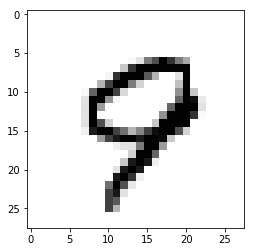

In [2]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()





In [ ]:
'''
Epoch: 0001, Cost: 2.826302672
Epoch: 0002, Cost: 1.061668952
Epoch: 0003, Cost: 0.838061315
Epoch: 0004, Cost: 0.733232745
Epoch: 0005, Cost: 0.669279885
Epoch: 0006, Cost: 0.624611836
Epoch: 0007, Cost: 0.591160344
Epoch: 0008, Cost: 0.563868987
Epoch: 0009, Cost: 0.541745171
Epoch: 0010, Cost: 0.522673578
Epoch: 0011, Cost: 0.506782325
Epoch: 0012, Cost: 0.492447643
Epoch: 0013, Cost: 0.479955837
Epoch: 0014, Cost: 0.468893674
Epoch: 0015, Cost: 0.458703488
Learning finished
Accuracy:  0.8951
'''